## _Imports:_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## _Functions:_

In [3]:
def plot_column_distributions(dataframe, nrows=4, ncols=3, figsize=(18, 15)):
    plt.figure(figsize=figsize)

    for i, col in enumerate(dataframe.columns[:nrows*ncols], 1):
        plt.subplot(nrows, ncols, i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(dataframe[col], kde=True)
        plt.tight_layout()
        plt.plot()
    
    plt.show()

In [88]:
def plot_boxplots(dataframe):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
    axs = axes.flatten()

    for i, var in enumerate(dataframe.columns):
        sns.boxplot(x=var, data=dataframe, ax=axs[i], color= 'lightskyblue')
        axs[i].set_title(f"{var}")

    fig.tight_layout()
    plt.show()

In [5]:
#convert to snake case with iteration over columns using list comp
def columns_to_snake_case(df):
    df.columns = [column.replace(' ', '_').lower() for column in df.columns]
    return df

## _Initial Review:_

In [6]:
aci = pd.read_excel('../data/ACI_data.xlsx')

In [25]:
aci.head(8)

auth_user_id   id  team_id                   created_at arena_location  \
0            42   42      NaN  2022-03-03T21:42:22.846158Z   in_the_thick   
1           314  314      NaN  2022-04-07T02:30:40.588856Z     ramping_up   
2           331  331      NaN  2022-04-06T14:17:20.230974Z     ramping_up   
3           814  806     97.0  2023-06-19T05:34:14.448635Z     recharging   
4           814  806     97.0  2023-06-19T05:34:08.325486Z     recharging   
5           814  806     97.0  2023-06-18T16:31:50.209519Z     recharging   
6           814  806     97.0   2023-06-17T10:33:26.31526Z     recharging   
7           814  806     97.0  2023-06-16T14:13:24.907987Z     recharging   

   current_stress  current_energy  current_focus  challenge_anticipated  \
0              15              67             75                    NaN   
1              37              48             26                   38.0   
2              37              37             41                   30.0   
3               9              93             98                    NaN   
4               9              93             98                    NaN   
5              14              88             88                    NaN   
6               8              93            100                    NaN   
7              57              64             57                    NaN   

   preparedness  make_key_decisions  clinical_performance  
0           NaN                 NaN                   NaN  
1          47.0                 NaN                   NaN  
2          50.0                 NaN                   NaN  
3           NaN                 NaN                   NaN  
4           NaN                 NaN                   NaN  
5           NaN                 NaN                   NaN  
6           NaN                 NaN                   NaN  
7           NaN                 NaN                   NaN

In [9]:
aci.shape

(4432, 12)

In [15]:
aci.dtypes

auth_user_id               int64
id                         int64
team_id                  float64
created_at                object
arena_location            object
current_stress             int64
current_energy             int64
current_focus              int64
challenge_anticipated    float64
preparedness             float64
make_key_decisions       float64
clinical_performance     float64
dtype: object

In [10]:
aci.isnull().sum()

auth_user_id                0
id                          0
team_id                     3
created_at                  0
arena_location              0
current_stress              0
current_energy              0
current_focus               0
challenge_anticipated    3081
preparedness             3081
make_key_decisions       3375
clinical_performance     3375
dtype: int64

In [35]:
#how many teams are we working with and their numbers
value_counts = aci.arena_location.value_counts()

# Display the count of unique values and their respective values
print("Number of unique values:", aci.arena_location.nunique())
print("Unique values:")
for value, count in value_counts.items():
            print(value)

Number of unique values: 4
Unique values:
ramping_up
recharging
winding_down
in_the_thick


In [14]:
#how many teams are we working with and their numbers
value_counts = aci.team_id.value_counts()

# Display the count of unique values and their respective values
print("Number of unique values:", aci.team_id.nunique())
print("Unique values:")
for value, count in value_counts.items():
    print(value)

Number of unique values: 4
Unique values:
95.0
97.0
98.0
99.0


Since these are the same cohorts, I will separate then just like the last notebook. *Note that there are 3 entries that do not have a team_id attached. Since there are only 3, I will exclude them for now.

In [65]:
#splitting dataframes by team id
ac_95 = aci[aci['team_id'] == 95]

ac_97 = aci[aci['team_id'] == 97]

ac_98 = aci[aci['team_id'] == 98]

ac_99 = aci[aci['team_id'] == 99]


In [66]:
#will drop all id's since they're not needed for visuals or modeling.
ac_95= ac_95.drop(columns= ['team_id','auth_user_id','id','created_at'])
ac_97= ac_97.drop(columns= ['team_id','auth_user_id','id','created_at'])
ac_98= ac_98.drop(columns= ['team_id','auth_user_id','id','created_at'])
ac_99= ac_99.drop(columns= ['team_id','auth_user_id','id','created_at'])

In [91]:
#Export csv for modeling
aci.to_csv('../data/aci')

## _EDA (by team):_

### _95:_


In [67]:
ac_95.shape

(1397, 8)

In [68]:
ac_95.head()

arena_location  current_stress  current_energy  current_focus  \
2385   winding_down              34              69             55   
2386     ramping_up              54              78             52   
2387   winding_down              14              67             31   
2388     recharging               4              50             51   
2389     ramping_up              32              63             51   

      challenge_anticipated  preparedness  make_key_decisions  \
2385                    NaN           NaN                86.0   
2386                   23.0          36.0                 NaN   
2387                    NaN           NaN                42.0   
2388                    NaN           NaN                 NaN   
2389                   53.0          50.0                 NaN   

      clinical_performance  
2385                  48.0  
2386                   NaN  
2387                  27.0  
2388                   NaN  
2389                   NaN

In [69]:
ac_95.describe()

current_stress  current_energy  current_focus  challenge_anticipated  \
count     1397.000000     1397.000000    1397.000000             469.000000   
mean        38.667144       64.921260      60.510379              52.547974   
std         19.185533       17.965969      19.501067              17.850050   
min          0.000000        0.000000       0.000000               0.000000   
25%         24.000000       53.000000      50.000000              42.000000   
50%         39.000000       63.000000      58.000000              54.000000   
75%         53.000000       77.000000      72.000000              63.000000   
max        100.000000      100.000000     100.000000             100.000000   

       preparedness  make_key_decisions  clinical_performance  
count    469.000000          281.000000            281.000000  
mean      62.413646           68.434164             65.395018  
std       16.426718           16.777859             17.174852  
min        0.000000           22.000000             20.000000  
25%       52.000000           55.000000             53.000000  
50%       60.000000           66.000000             61.000000  
75%       72.000000           79.000000             77.000000  
max      100.000000          100.000000            100.000000

In [70]:
ac_95.isnull().sum()

arena_location              0
current_stress              0
current_energy              0
current_focus               0
challenge_anticipated     928
preparedness              928
make_key_decisions       1116
clinical_performance     1116
dtype: int64

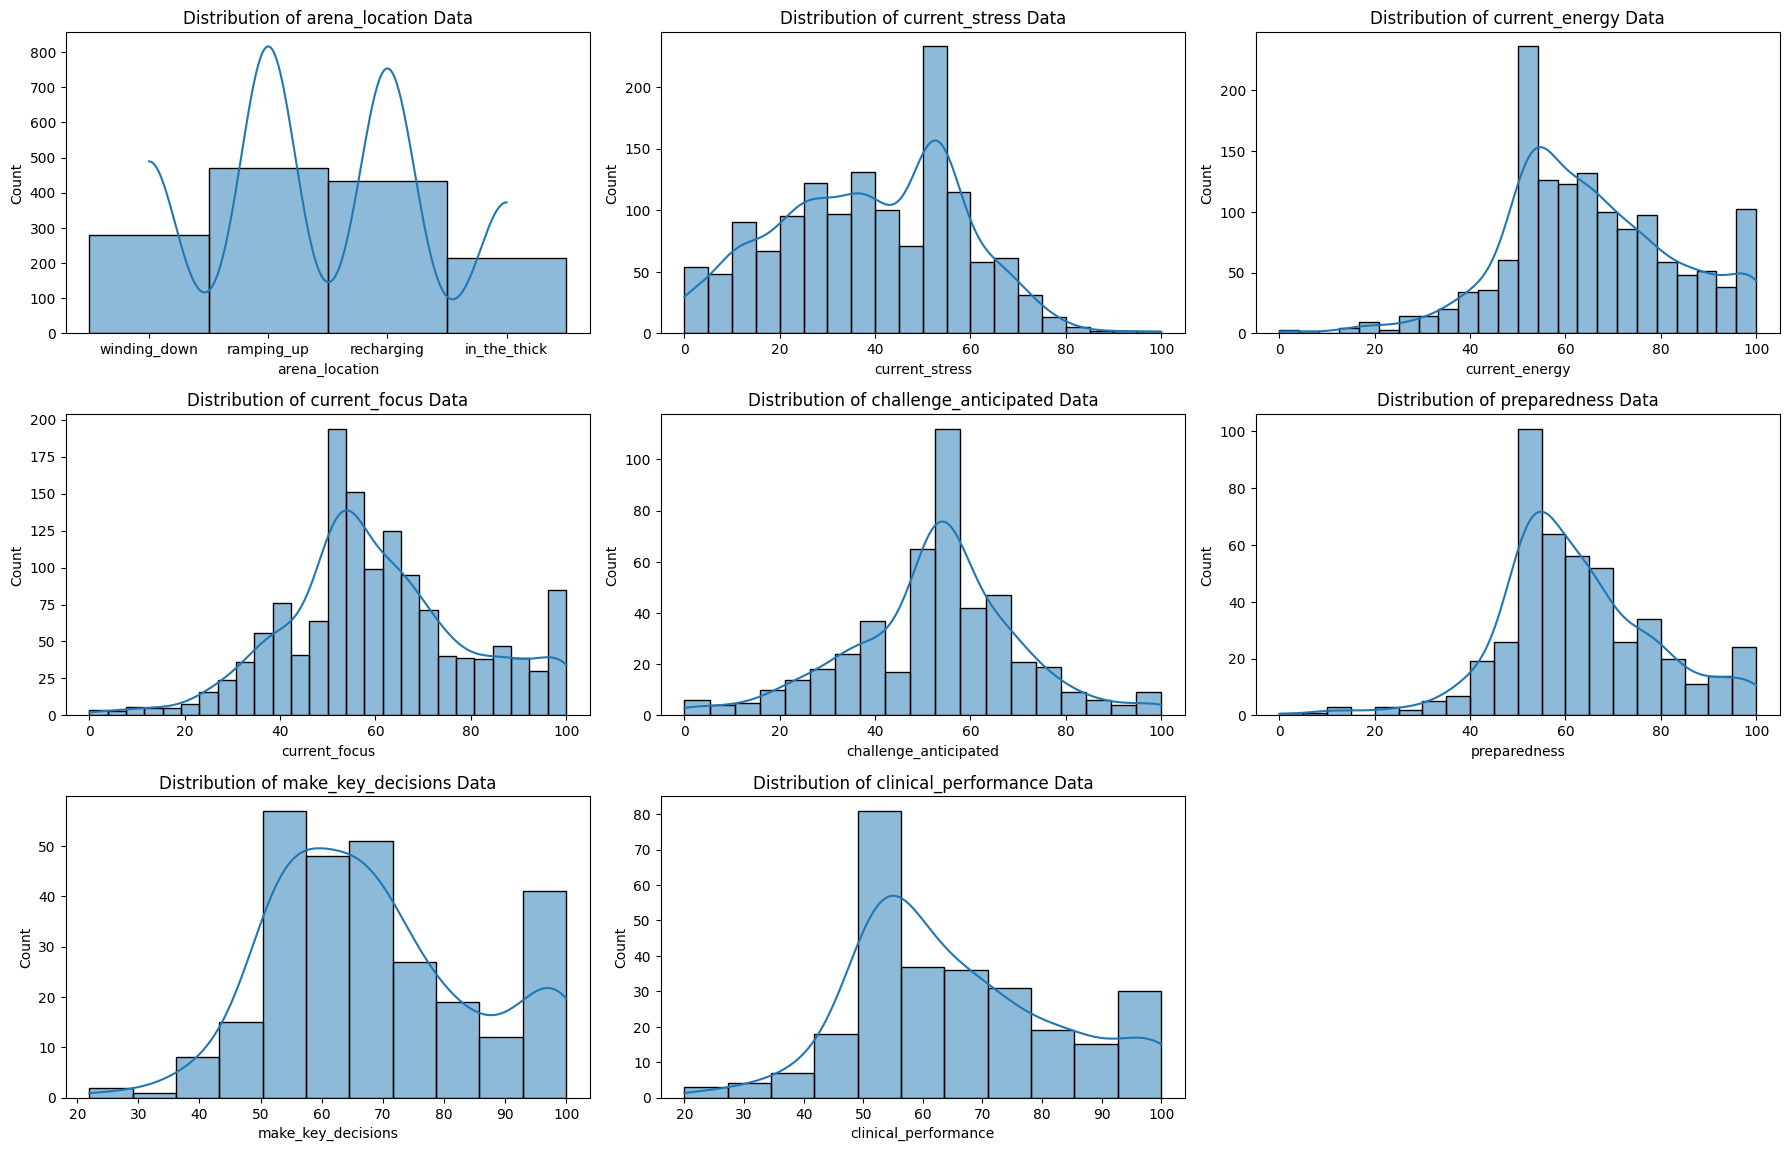

In [71]:
plot_column_distributions(ac_95)

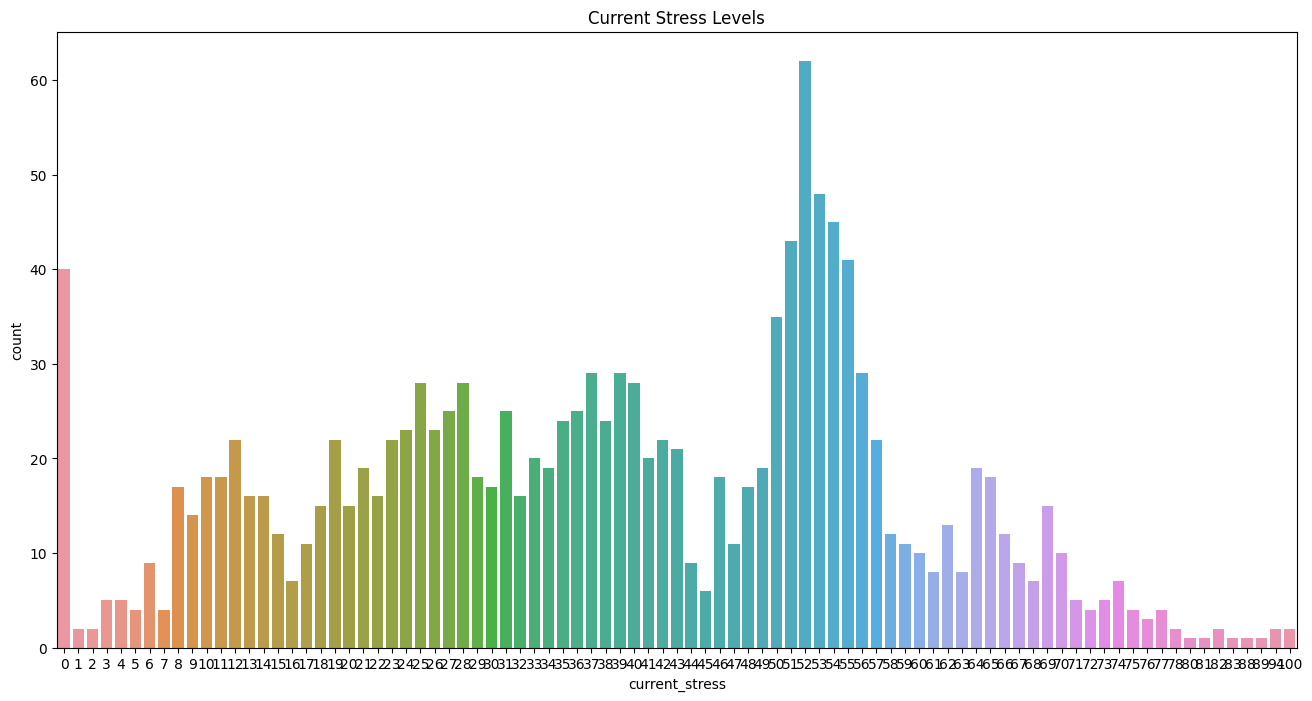

In [112]:
plt.figure(figsize=(16,8))
sns.countplot(data=ac_95,x='current_stress')
plt.title('Current Stress Levels');

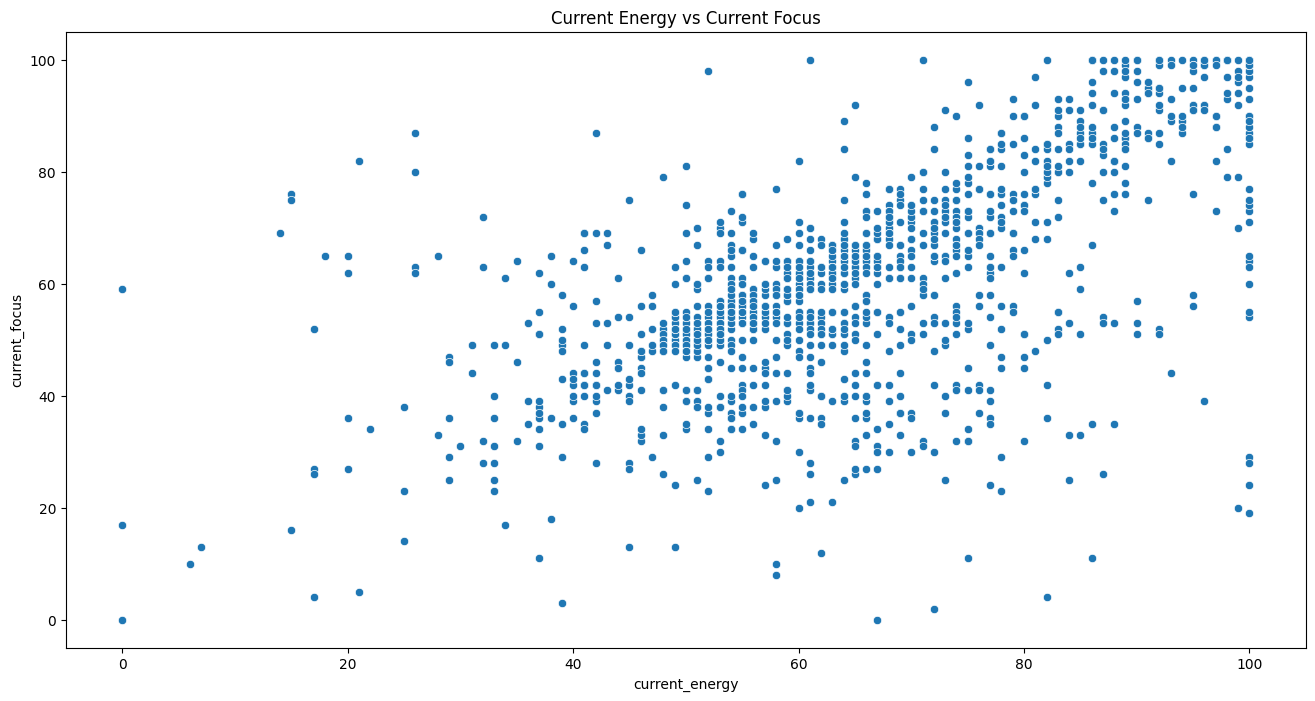

In [117]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=ac_95,x='current_energy',y='current_focus')
plt.title("Current Energy vs Current Focus");

In [114]:
plt.figure(figsize=(16,8))
sns.boxplot(data=ac_95,x='current_energy',y='current_stress');
plt.title('Current Energy vs. Current Stress');

### _97:_

In [72]:
ac_97.shape

(1341, 8)

In [73]:
ac_97.head()

arena_location  current_stress  current_energy  current_focus  \
3     recharging               9              93             98   
4     recharging               9              93             98   
5     recharging              14              88             88   
6     recharging               8              93            100   
7     recharging              57              64             57   

   challenge_anticipated  preparedness  make_key_decisions  \
3                    NaN           NaN                 NaN   
4                    NaN           NaN                 NaN   
5                    NaN           NaN                 NaN   
6                    NaN           NaN                 NaN   
7                    NaN           NaN                 NaN   

   clinical_performance  
3                   NaN  
4                   NaN  
5                   NaN  
6                   NaN  
7                   NaN

In [74]:
ac_97.describe()

current_stress  current_energy  current_focus  challenge_anticipated  \
count     1341.000000     1341.000000    1341.000000             332.000000   
mean        39.623415       61.998509      54.649515              54.563253   
std         20.799735       17.358855      17.247610              21.438289   
min          0.000000        6.000000       0.000000               0.000000   
25%         24.000000       52.000000      44.000000              42.000000   
50%         39.000000       61.000000      55.000000              55.000000   
75%         55.000000       71.000000      65.000000              69.000000   
max        100.000000      100.000000     100.000000             100.000000   

       preparedness  make_key_decisions  clinical_performance  
count    332.000000          351.000000            351.000000  
mean      60.027108           65.059829             61.914530  
std       17.066845           16.904754             15.184526  
min       10.000000           16.000000              6.000000  
25%       51.750000           53.000000             52.000000  
50%       60.000000           64.000000             61.000000  
75%       70.000000           77.000000             74.000000  
max      100.000000          100.000000            100.000000

In [75]:
ac_97.isnull().sum()

arena_location              0
current_stress              0
current_energy              0
current_focus               0
challenge_anticipated    1009
preparedness             1009
make_key_decisions        990
clinical_performance      990
dtype: int64

In [76]:
plot_column_distributions(ac_97)

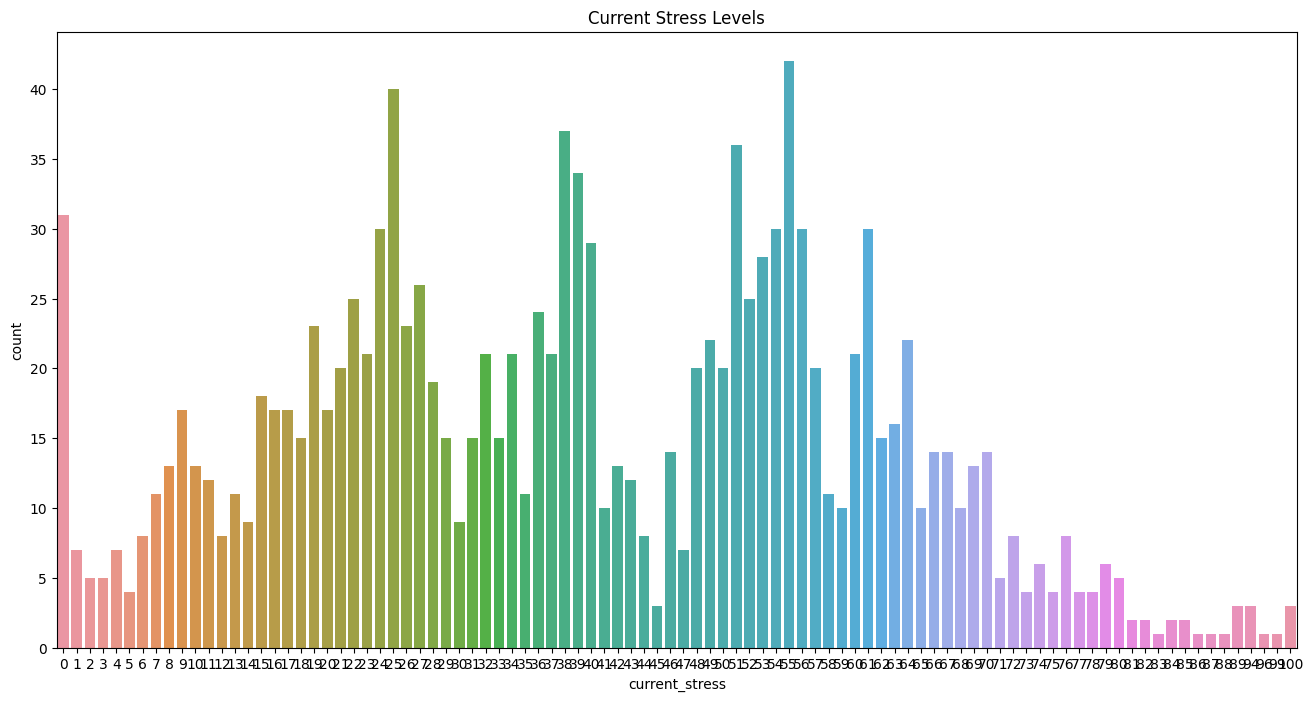

In [111]:
plt.figure(figsize=(16,8))
sns.countplot(data=ac_97,x='current_stress')
plt.title("Current Stress Levels");

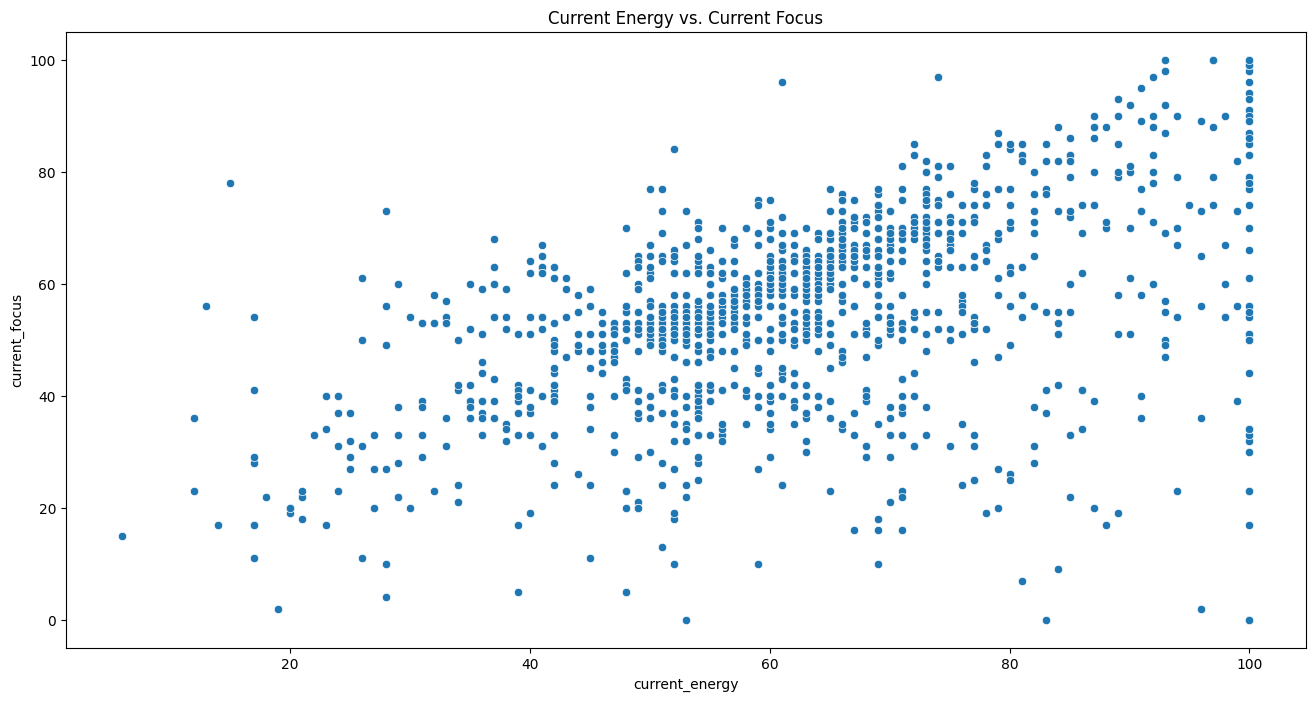

In [110]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=ac_97,x='current_energy',y='current_focus')
plt.title('Current Energy vs. Current Focus');

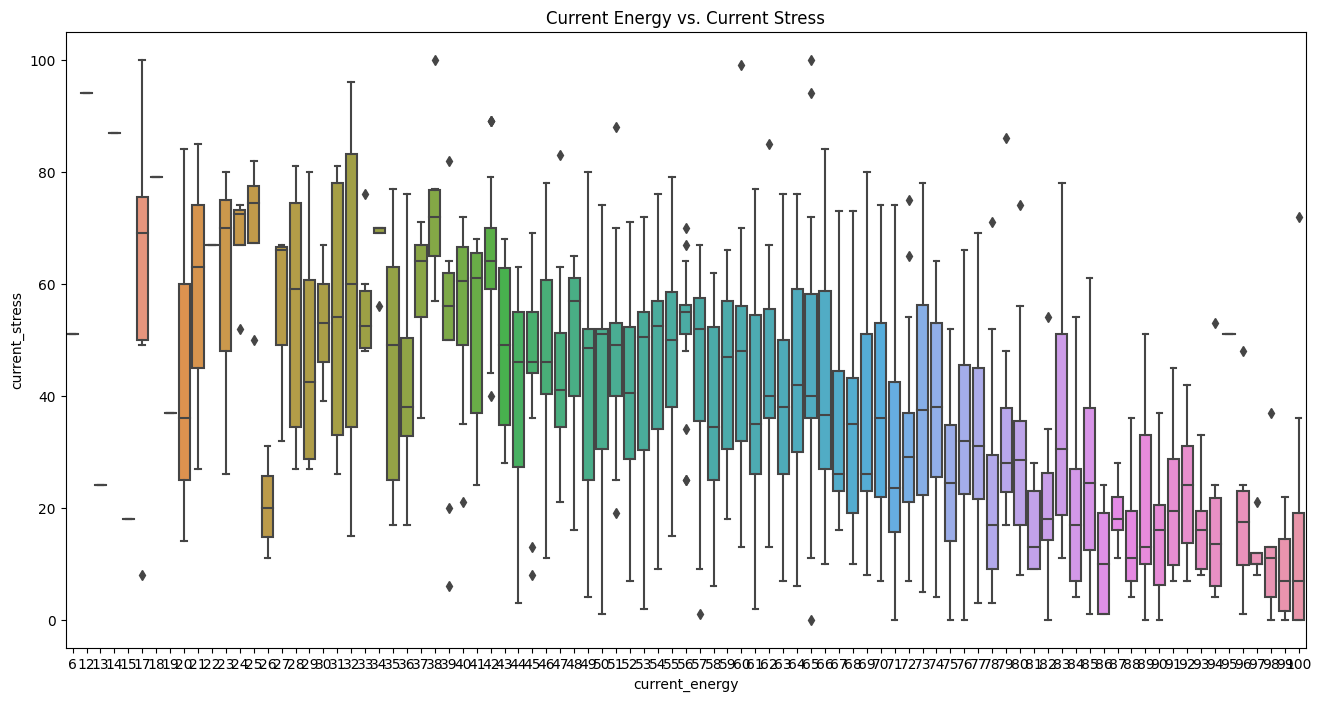

In [115]:
plt.figure(figsize=(16,8))
sns.boxplot(data=ac_97,x='current_energy',y='current_stress');
plt.title('Current Energy vs. Current Stress');

### _98:_

In [77]:
ac_98.shape

(1153, 8)

In [78]:
ac_98.head()

arena_location  current_stress  current_energy  current_focus  \
641     ramping_up              13              83             72   
642     ramping_up              63              55             68   
643     recharging              17              90             74   
644     recharging              18              82             74   
645   winding_down              18              65             39   

     challenge_anticipated  preparedness  make_key_decisions  \
641                   12.0          80.0                 NaN   
642                   96.0          68.0                 NaN   
643                    NaN           NaN                 NaN   
644                    NaN           NaN                 NaN   
645                    NaN           NaN                73.0   

     clinical_performance  
641                   NaN  
642                   NaN  
643                   NaN  
644                   NaN  
645                  74.0

In [79]:
ac_98.describe()

current_stress  current_energy  current_focus  challenge_anticipated  \
count     1153.000000     1153.000000    1153.000000             370.000000   
mean        31.625325       62.430182      55.922810              53.508108   
std         18.214104       16.136479      16.508945              18.671201   
min          0.000000        3.000000       0.000000               0.000000   
25%         19.000000       52.000000      45.000000              43.000000   
50%         30.000000       62.000000      56.000000              55.000000   
75%         44.000000       71.000000      67.000000              66.000000   
max         83.000000      100.000000     100.000000             100.000000   

       preparedness  make_key_decisions  clinical_performance  
count    370.000000          266.000000            266.000000  
mean      59.089189           70.469925             67.462406  
std       14.191304           14.064039             13.853155  
min        8.000000            9.000000             21.000000  
25%       52.000000           62.250000             56.000000  
50%       59.500000           70.000000             68.000000  
75%       67.000000           81.000000             78.000000  
max      100.000000          100.000000            100.000000

In [80]:
ac_98.isnull().sum()

arena_location             0
current_stress             0
current_energy             0
current_focus              0
challenge_anticipated    783
preparedness             783
make_key_decisions       887
clinical_performance     887
dtype: int64

In [81]:
plot_column_distributions(ac_98)

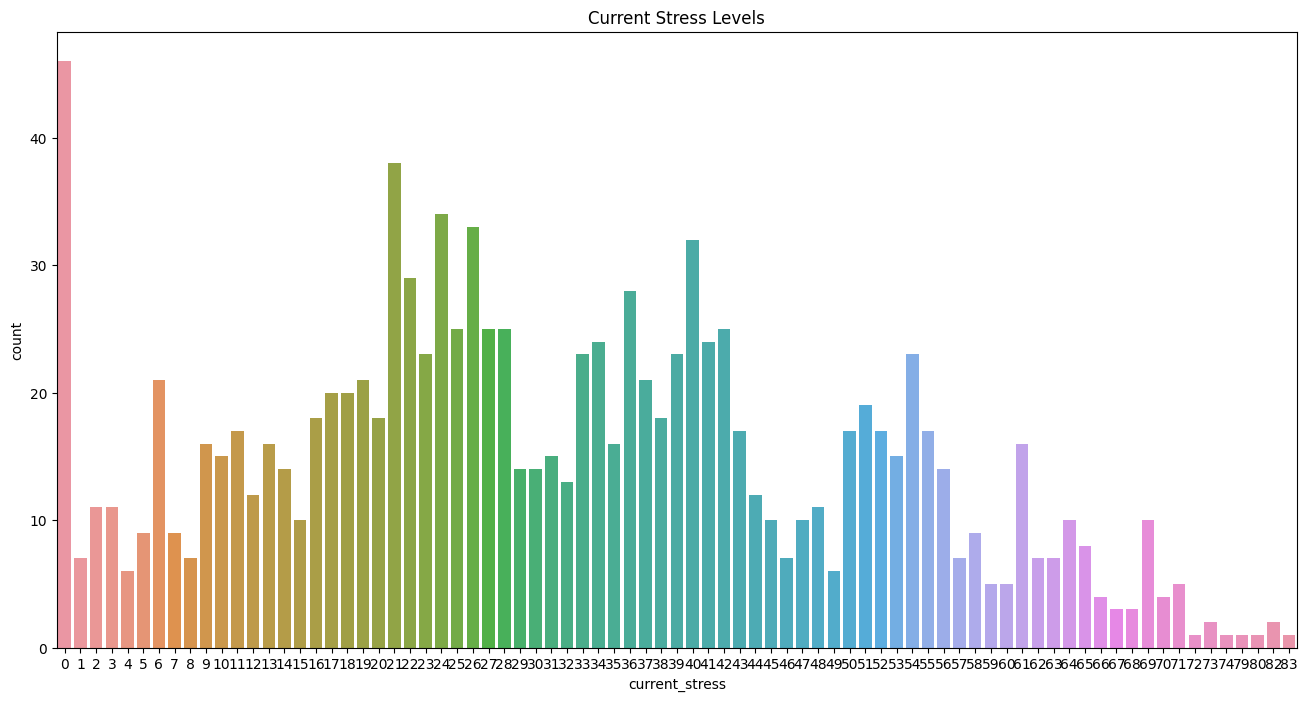

In [109]:
plt.figure(figsize=(16,8))
sns.countplot(data=ac_98,x='current_stress')
plt.title('Current Stress Levels');

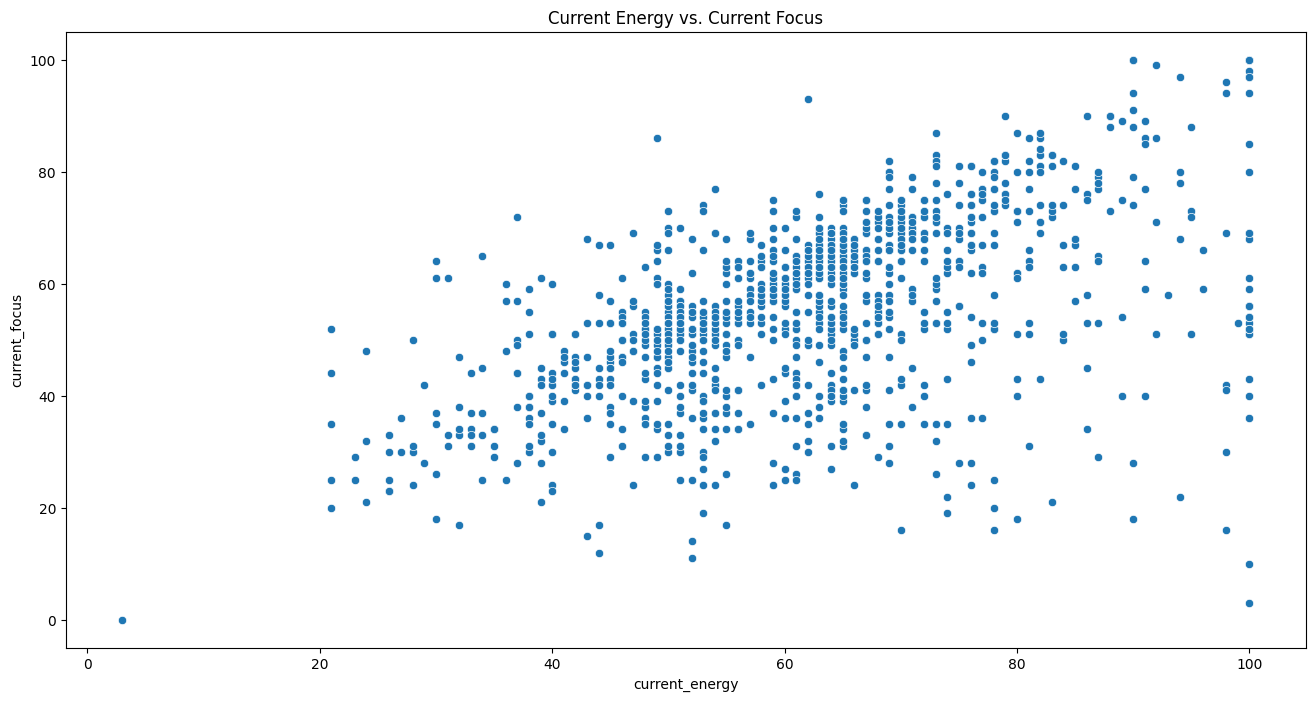

In [105]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=ac_98,x='current_energy',y='current_focus')
plt.title('Current Energy vs. Current Focus');

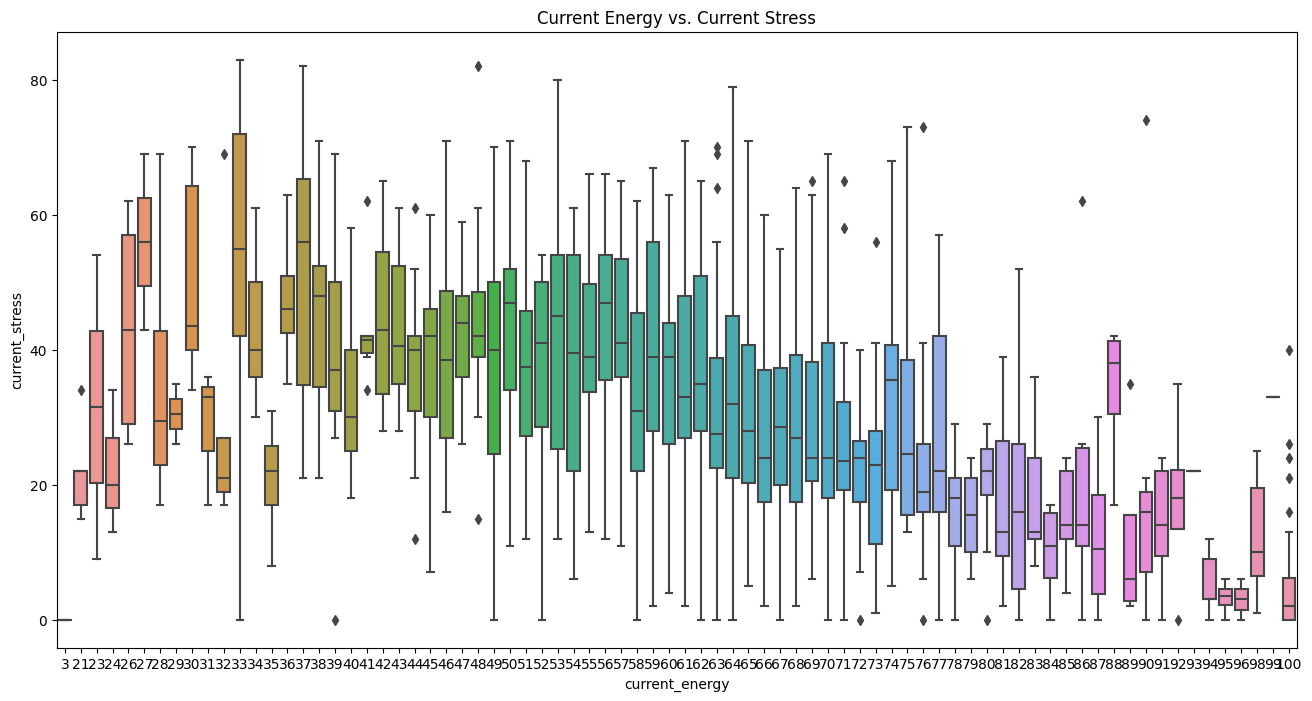

In [113]:
plt.figure(figsize=(16,8))
sns.boxplot(data=ac_98,x='current_energy',y='current_stress');
plt.title('Current Energy vs. Current Stress');

### _99:_

In [82]:
ac_99.shape

(538, 8)

In [83]:
ac_99.head()

arena_location  current_stress  current_energy  current_focus  \
3782     ramping_up              16              67             71   
3783     ramping_up              18              65             64   
3784     ramping_up              24              58             74   
3785     ramping_up              24              64             66   
3786     ramping_up              41              64             61   

      challenge_anticipated  preparedness  make_key_decisions  \
3782                   28.0          70.0                 NaN   
3783                   20.0          59.0                 NaN   
3784                   65.0          70.0                 NaN   
3785                   55.0          58.0                 NaN   
3786                   57.0          61.0                 NaN   

      clinical_performance  
3782                   NaN  
3783                   NaN  
3784                   NaN  
3785                   NaN  
3786                   NaN

In [84]:
ac_99.describe()

current_stress  current_energy  current_focus  challenge_anticipated  \
count      538.000000      538.000000     538.000000             178.000000   
mean        35.312268       66.230483      58.778810              46.853933   
std         18.676384       16.679776      18.856544              22.106343   
min          0.000000        8.000000       6.000000               0.000000   
25%         20.250000       55.000000      48.000000              29.250000   
50%         37.000000       63.000000      59.000000              50.000000   
75%         50.000000       77.750000      68.000000              59.750000   
max        100.000000      100.000000     100.000000             100.000000   

       preparedness  make_key_decisions  clinical_performance  
count    178.000000          159.000000            159.000000  
mean      62.803371           68.176101             65.150943  
std       15.002094           16.551238             14.734008  
min       33.000000           22.000000             30.000000  
25%       55.000000           57.000000             53.000000  
50%       61.000000           65.000000             62.000000  
75%       68.000000           79.500000             76.000000  
max      100.000000          100.000000            100.000000

In [85]:
ac_99.isnull().sum()

arena_location             0
current_stress             0
current_energy             0
current_focus              0
challenge_anticipated    360
preparedness             360
make_key_decisions       379
clinical_performance     379
dtype: int64

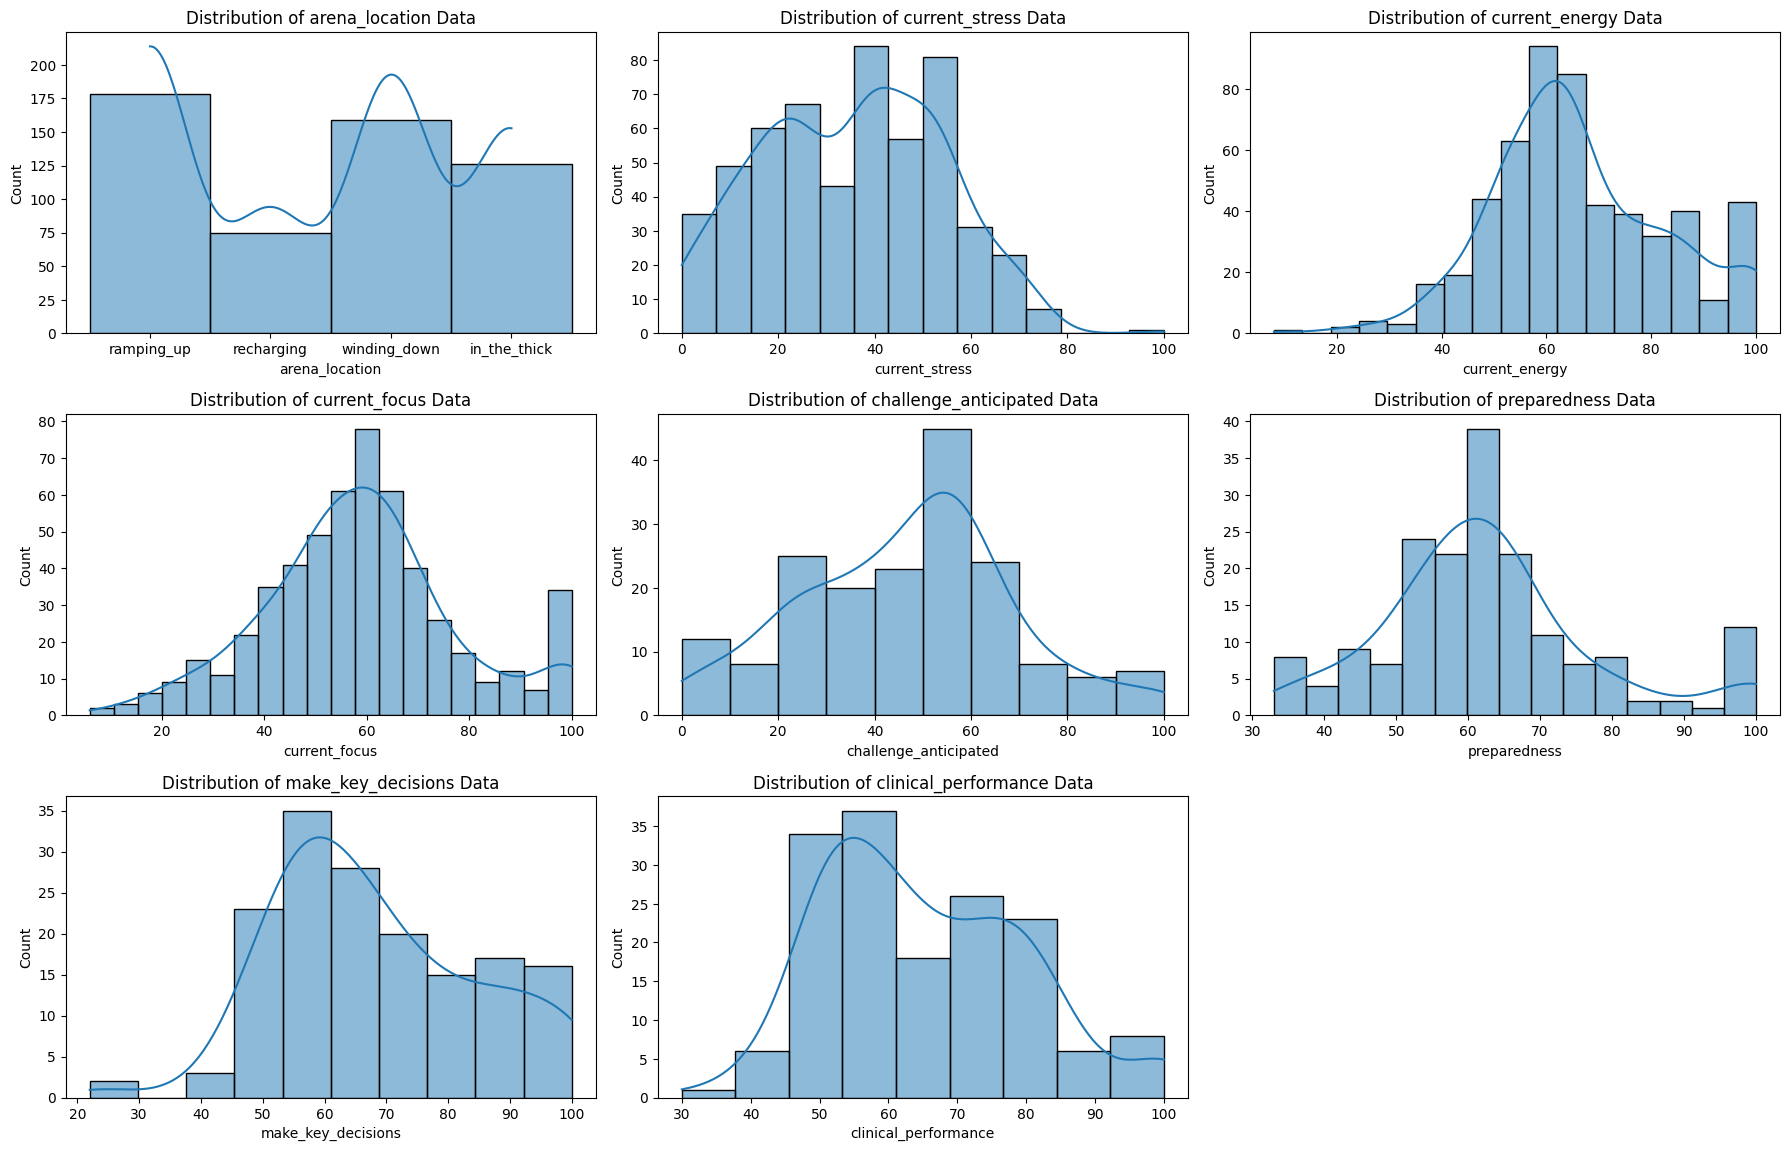

In [86]:
plot_column_distributions(ac_99)

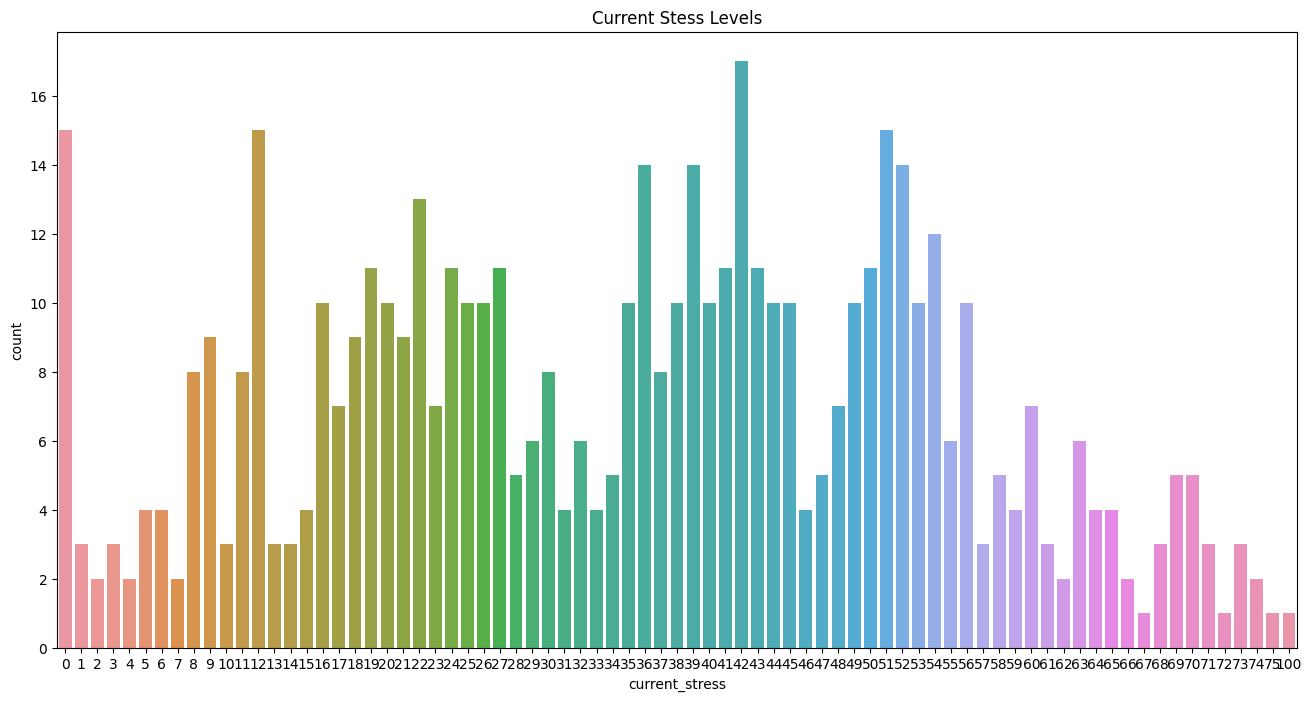

In [107]:
plt.figure(figsize=(16,8))
sns.countplot(data=ac_99,x='current_stress')
plt.title("Current Stess Levels");

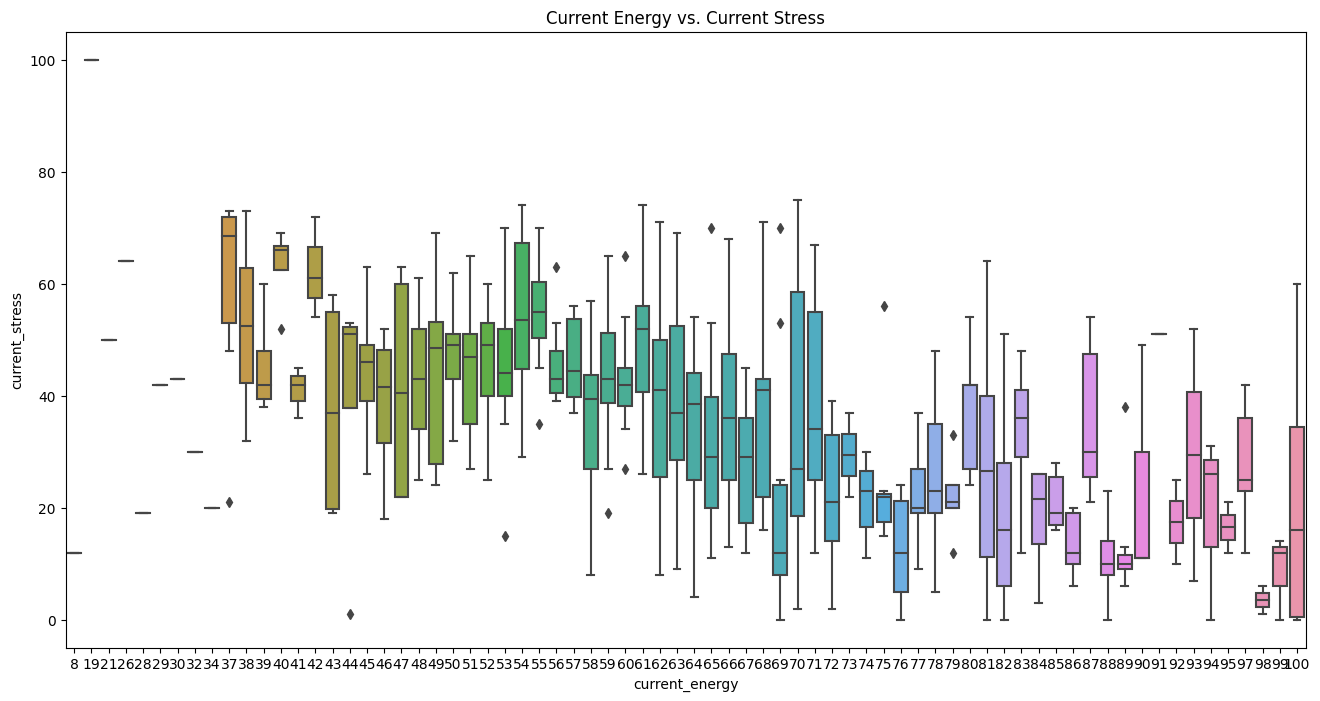

In [108]:
plt.figure(figsize=(16,8))
sns.boxplot(data=ac_99,x='current_energy',y='current_stress')
plt.title('Current Energy vs. Current Stress');